# Decision Tree algorithm

In [25]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset using pandas module
dataset = pd.read_csv('decisionTree_Data.csv')
# splitting the dataset into input and output datasets
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values

In [26]:
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
# random state is 0 and test size if 25%
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.25, random_state=0)

In [27]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# providing the inputs for the scalling purpose
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)
# providing the training dataset
classifer.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
y_pred= classifer.predict(X_test)

In [33]:
# importing the accuracy score
from sklearn.metrics import accuracy_score
# accuracy
print(accuracy_score(y_test, y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


0.9
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



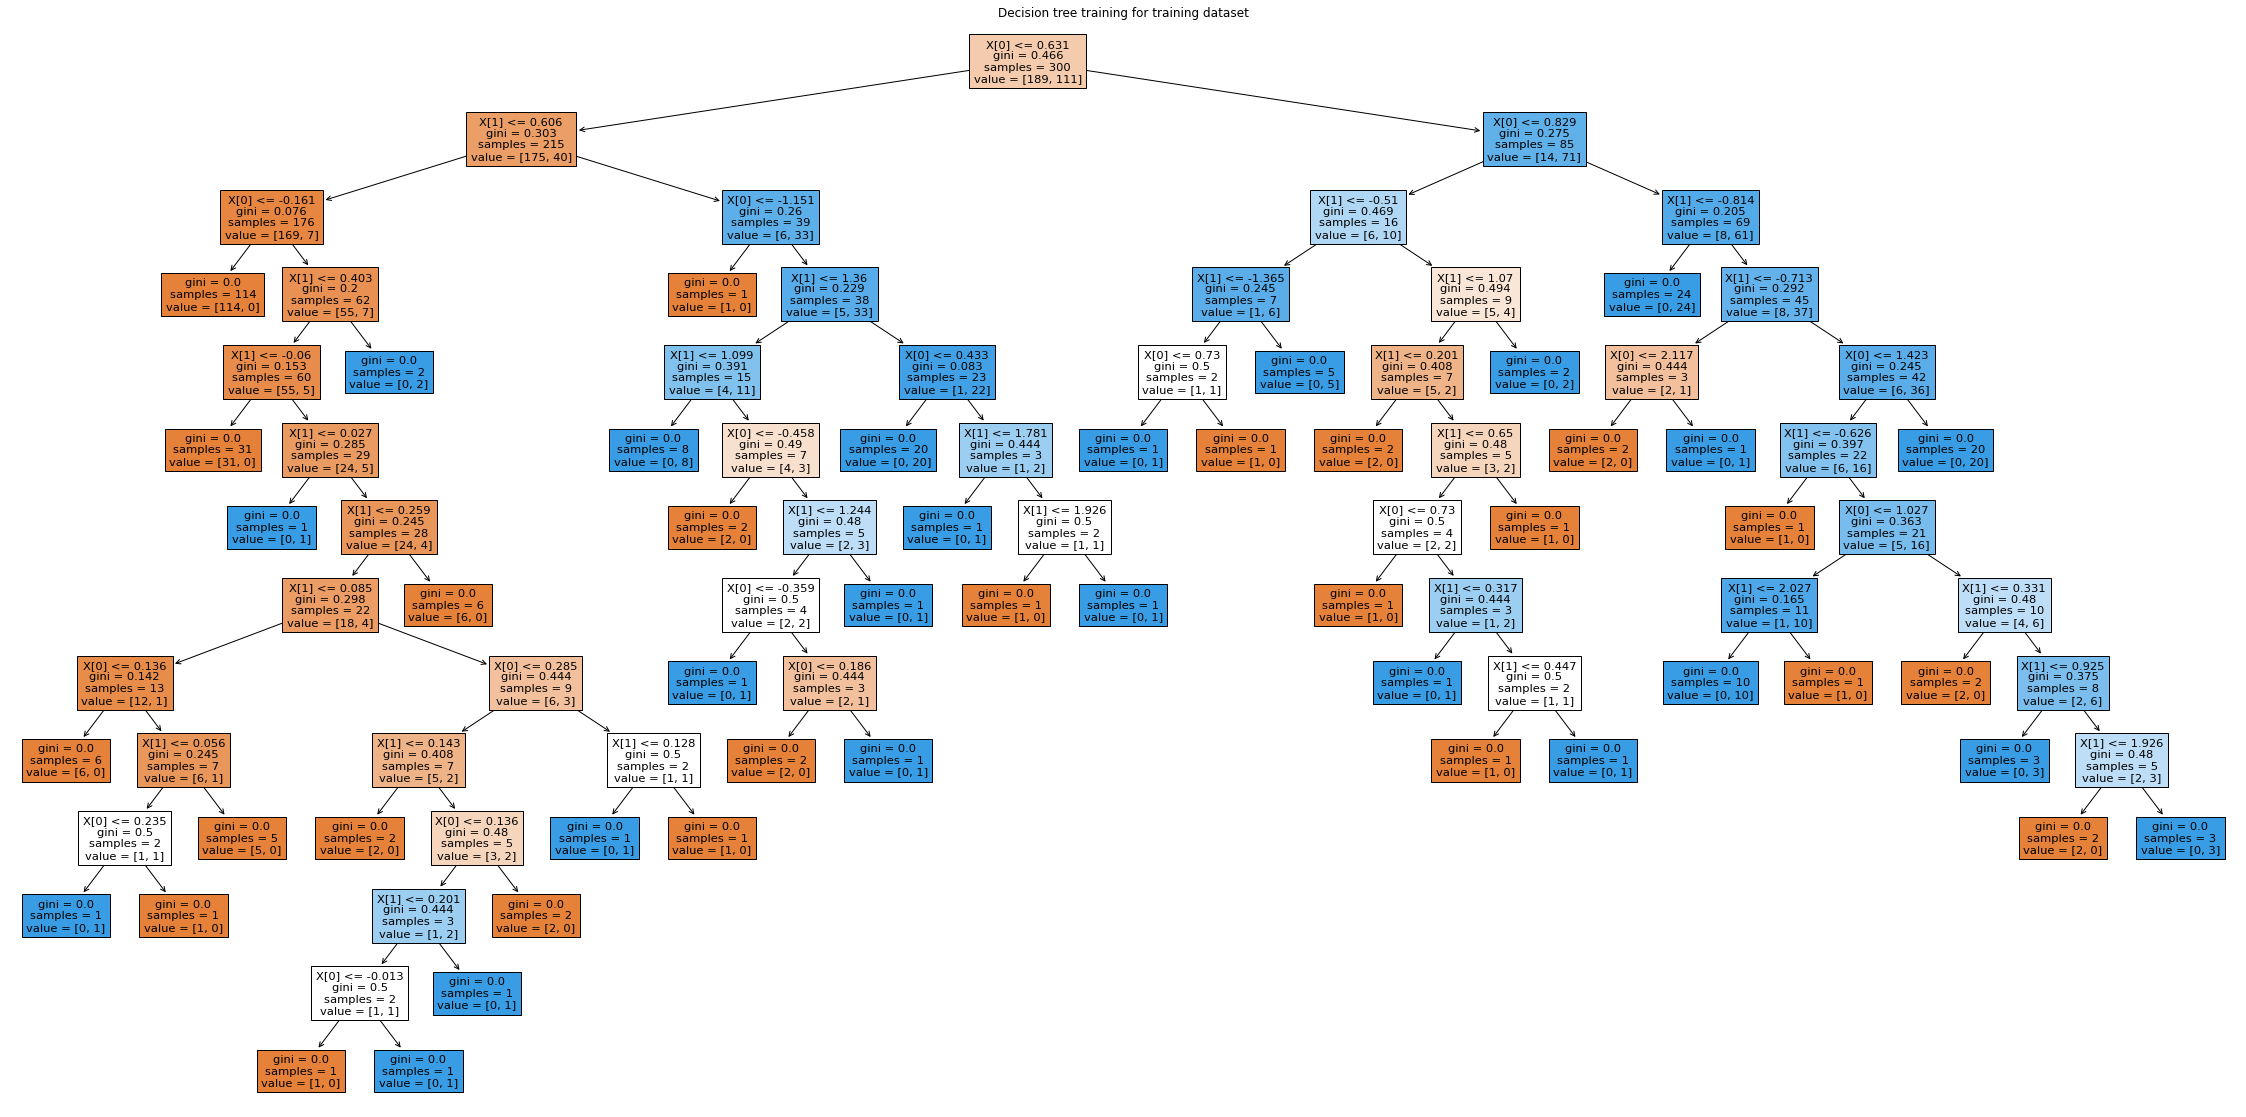

In [38]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()
# output size of decision tree
plt.figure(figsize=(40,20))
# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [11]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.16
|   |   |   |--- feature_1 <= 0.40
|   |   |   |   |--- feature_1 <= -0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.06
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   

In [22]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
 
clf = DecisionTreeClassifier()
 
 
 
dataset = pd.read_csv('decisionTree_Data.csv')
feature_values = dataset.iloc[:, [0,1]].values
target_value = dataset.iloc[:, 2].values
 
# feature_values = dataset.drop('match_outcome', axis=1)
 
# target_value = dataset.match_outcome
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_values, target_value, train_size=0.75, random_state=42)
 

from sklearn.metrics import classification_report

# these are the parameter that RandomizedSearchCV tries to search for to get high accuracy. 
# For example one of the important Decision Tree parameters criterion takes either gini or entropy and randomizedsearchcv checks which one of them is doing better.
params = [
    {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_features':['auto', 'sqrt', 'log2'],
        'random_state': [42]
    }
]
 
# here we are giving DecisionTree=clf and its parameters values=params, cross-validation=5 which metric to 
# evaluate=accuracy n_jobs=-1 uses all cores of processor
DT_CV = RandomizedSearchCV(clf, params, cv = 2, scoring = ['accuracy'], refit = 'accuracy', n_jobs = -1, random_state=42,)
 
# here to train your model instead of Decision Tree itself you need to use randomizedsearchcv DT_CV
DT_CV.fit(X_train, y_train)
 
 
DT_prediction = DT_CV.predict(X_test)
 
 
print(f' {classification_report(y_test, DT_prediction)}\n')
from sklearn.metrics import accuracy_score
accuracy_score(y_test,DT_prediction)

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        63
           1       0.81      0.81      0.81        37

    accuracy                           0.86       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.86      0.86      0.86       100




0.86